
# Capstone Project 

# Author : Hamidreza Salahi

# Notebook : 2

# Exploratory Data Analysis (EDA)

This notebook deals with Exploratory Data Analysis (EDA). The goal here is (i) to provide some insight into the dataset and (ii) doing further data cleaning 

## Contents:
* [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing clean data
loan_sample = pd.read_csv('C:\\Users\\hamid\\Desktop\\Capstone\\Data\\loan_sample.csv')

loan_sample.head()

,loan_status,last_fico_avg,int_rate,term,fico_avg,acc_open_past_24mths,bc_open_to_buy,num_tl_op_past_12m,funded_amnt,loan_amnt,...,application_type,emp_length,grade,sub_grade,emp_title,home_ownership,verification_status,purpose,title,addr_state
0,0,697.0,20.55,60,702.0,7.0,17662.0,3.0,32025.0,32025.0,...,1,7,D,D2,office manager,MORTGAGE,Source Verified,debt_consolidation,Debt consolidation,MN
1,0,682.0,9.99,36,687.0,4.0,1230.0,3.0,11200.0,11200.0,...,0,10,B,B3,FUEL SYSTEMS MAINTENANCE,RENT,Verified,debt_consolidation,Debt consolidation,FL
2,0,692.0,15.05,36,662.0,2.0,1830.0,1.0,20000.0,20000.0,...,0,1,C,C4,Registered Nurse,RENT,Verified,debt_consolidation,Debt consolidation,FL
3,1,507.0,11.53,36,672.0,2.0,274.0,1.0,10000.0,10000.0,...,0,1,B,B5,Product Manager,RENT,Not Verified,credit_card,Credit card refinancing,IL
4,1,507.0,17.27,60,662.0,5.0,3987.0,1.0,11050.0,11050.0,...,0,10,D,D3,SLS,MORTGAGE,Source Verified,debt_consolidation,Debt consolidation,CA


In [3]:
loan_sample.shape

(235027, 50)

In the first step of EDA, I am going to look at the correlation between the various features. There are columns that I expect to be highly correlated e.g., the loan amount (loan_amnt) and installment should be highly possitively correlated i.e., the more amount of loan you are approved for, the more you must pay back.  <br>
I will drop columns with high correlation. By *high* correlation I mean any correlation whose **magnitude** is greater than 0.5

<AxesSubplot:>

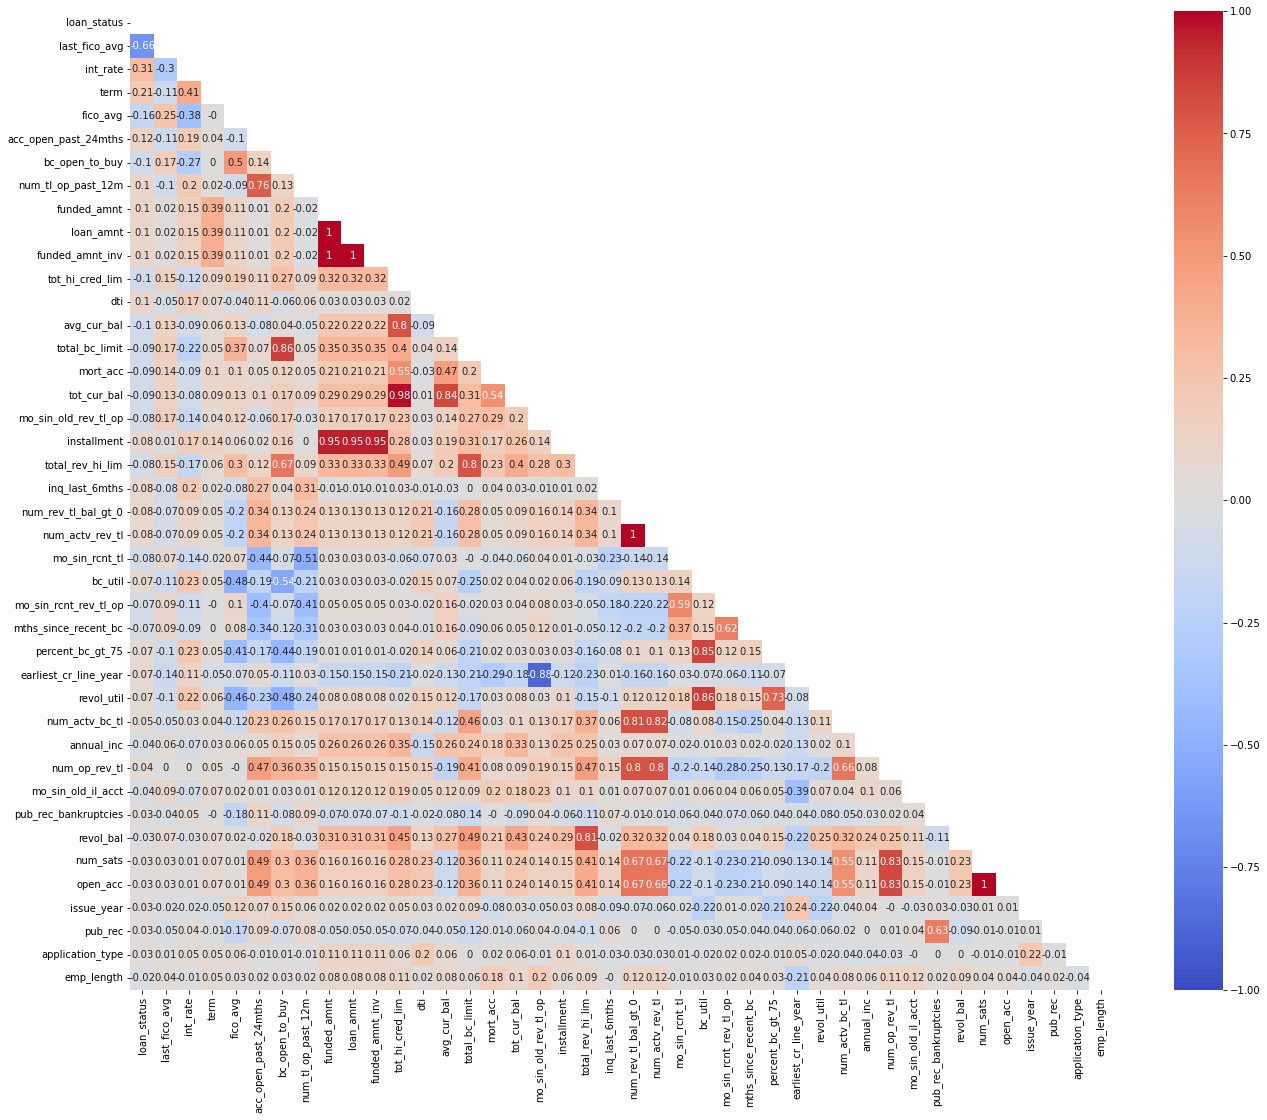

In [4]:
mask = np.triu(loan_sample.corr())
plt.figure(figsize=(22, 18))
sns.heatmap(round(loan_sample.corr(),2), 
            annot = True,
            cmap = 'coolwarm', 
            vmin = -1, 
            vmax = 1,
            mask = mask)

There exists relatively high correlation between some columns e.g., loan amount (loan_amnt) and fundend_amnt_inv (The total amount committed by investors for that loan at that point in time). A very high correlation between loan_amnt and installment is seen (as expected). Also, pub_rec_bankruptcies (number of public record bankruptcies) and pub_rec (number of derogatory public records) are highly correlated. <br>
To remove collinearity from our dataset, I will drop the following columns: <br>
* `bc_open_to_buy`
* `num_tl_op_past_12m`
* `funded_amnt_inv`
* `installment`
* `avg_cur_bal`
* `mort_acc`
* `tot_cur_bal`
* `total_bc_limit`
* `mo_sin_old_rev_tl_op`
* `total_rev_hi_lim`
* `num_rev_tl_bal_gt_0`
* `num_actv_rev_tl`
* `bc_util`
* `percent_bc_gt_75`
* `num_actv_bc_tl`
* `num_op_rev_tl`
* `pub_rec_bankruptcies`
* `num_sats`

In [5]:
drop_cols = ['bc_open_to_buy','num_tl_op_past_12m','funded_amnt_inv','installment','avg_cur_bal'\
            ,'mort_acc', 'tot_cur_bal', 'total_bc_limit','mo_sin_old_rev_tl_op','total_rev_hi_lim',\
             'num_rev_tl_bal_gt_0','num_actv_rev_tl','bc_util','percent_bc_gt_75','num_actv_bc_tl','num_op_rev_tl'\
            ,'pub_rec_bankruptcies', 'num_sats']
loan_sample.drop(columns=drop_cols, inplace=True)

In [6]:
loan_sample.shape

(235027, 32)

Let's look at the distribution of all numeric columns. <br>
**NOTE: The df.hist does not plot the categorical columns. We will investigate those columns later on**

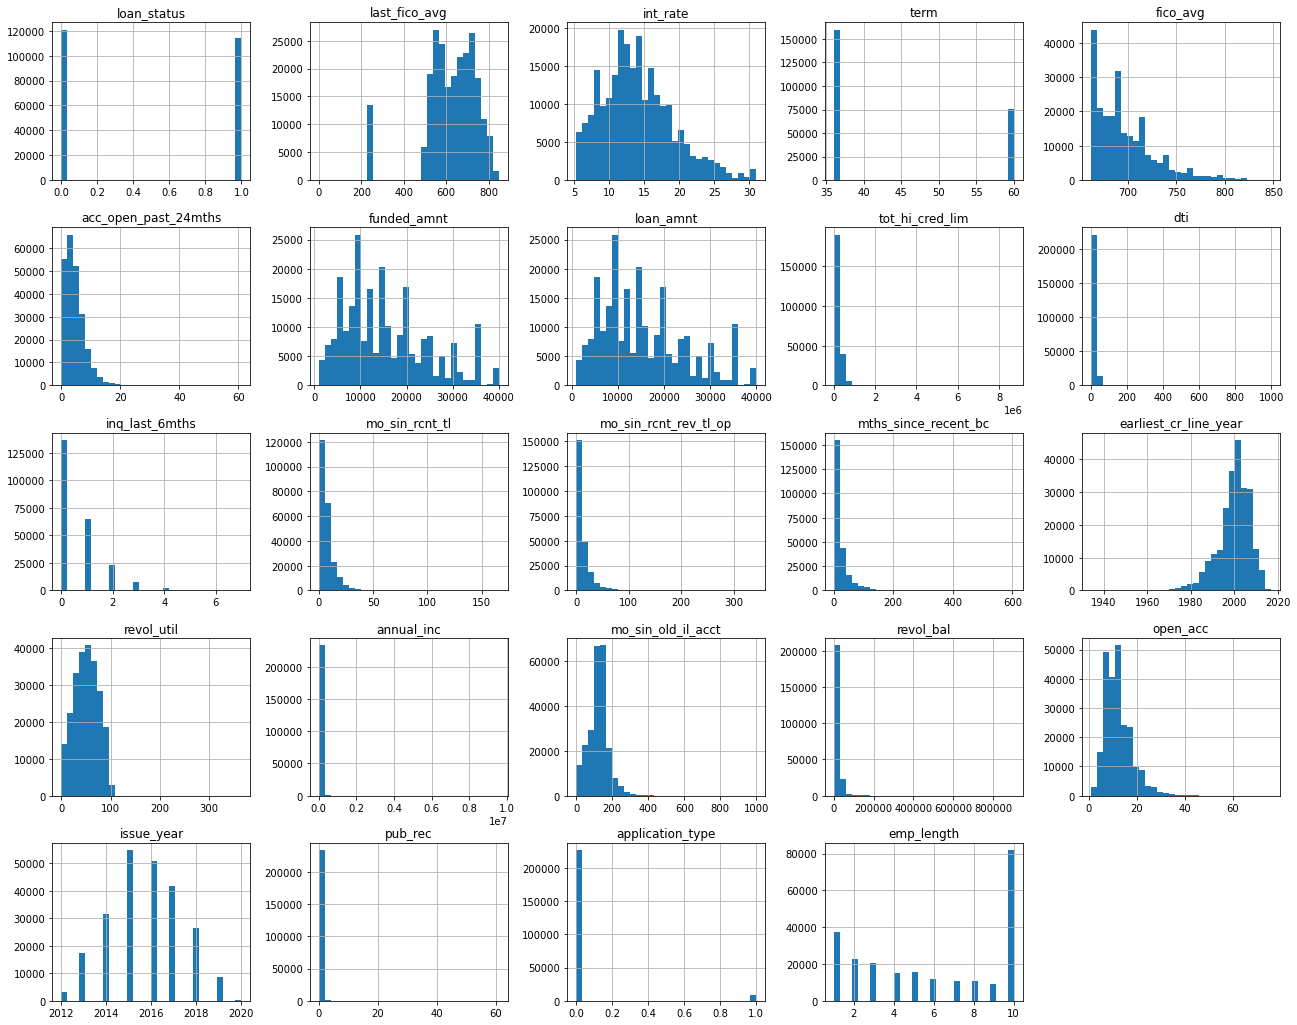

In [7]:
loan_sample.hist(bins=30, figsize=(22, 18))
plt.show()

The issue here is that some of the distribtions are highly skewed to the right or to the left e,g., `dti` , `annual_inc` and `pub_rec`. 

In [8]:
loan_sample.skew().sort_values(ascending=False)

C:\Users\hamid\AppData\Local\Temp\ipykernel_9376\3249953530.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  loan_sample.skew().sort_values(ascending=False)


annual_inc               51.664799
dti                      18.582458
pub_rec                  14.209622
revol_bal                 9.099822
application_type          4.788549
mo_sin_rcnt_tl            3.870659
mo_sin_rcnt_rev_tl_op     3.588544
mths_since_recent_bc      3.345063
tot_hi_cred_lim           3.142355
inq_last_6mths            1.682177
acc_open_past_24mths      1.397557
open_acc                  1.335909
fico_avg                  1.326968
term                      0.769269
funded_amnt               0.708989
loan_amnt                 0.708983
int_rate                  0.672246
mo_sin_old_il_acct        0.380865
loan_status               0.055803
issue_year               -0.003328
revol_util               -0.033915
emp_length               -0.120698
earliest_cr_line_year    -0.969588
last_fico_avg            -1.281985
dtype: float64

The issue with right and/or left skew should not create any problem as we will use MinMaxScaler in the modeling phase but since the MinMaxScaler is sensetive to outliers, we need to handle that before applying this method. <br>
I choose the maximum of each feature so that is covers more than 99.9% of all data e.g., considering the maximum annual income (max_annual_inc) so that 99.9% of the applicants have annual income equal or less than max_annual_inc. I would also not do it for all features. Only those features whose absolute value of their skew score shown above is greter than 0.8 i.e., `annual_inc`, `dti`, `pub_rec` , `revol_bal`, `mo_sin_rcnt_tl`, `mo_sin_rcnt_rev_tl_op`, `mths_since_recent_bc`, `tot_hi_cred_lim`, `inq_last_6mths`, `acc_open_past_24mths`, `open_acc`, `fico_avg`, `earliest_cr_line_year`, `last_fico_avg`

In [9]:
max_per = 0.999

In [10]:
cum_sum_annual_inc = loan_sample['annual_inc'].value_counts().sort_index().cumsum()/loan_sample.shape[0]
max_annual_inc = cum_sum_annual_inc[cum_sum_annual_inc.values<max_per].index[-1]
max_annual_inc

590000.0

In [11]:
cum_sum_dti = loan_sample['dti'].value_counts().sort_index().cumsum()/loan_sample.shape[0]
max_dti=cum_sum_dti[cum_sum_dti.values<max_per].index[-1]
max_dti

76.41

In [12]:
cum_sum_pub_rec = loan_sample['pub_rec'].value_counts().sort_index().cumsum()/loan_sample.shape[0]
max_pub_rec = cum_sum_pub_rec[cum_sum_pub_rec.values<max_per].index[-1]
max_pub_rec

5.0

In [13]:
cum_sum_revol_bal = loan_sample['revol_bal'].value_counts().sort_index().cumsum()/loan_sample.shape[0]
max_revol_bal = cum_sum_revol_bal[cum_sum_revol_bal.values<max_per].index[-1]
max_revol_bal

251411.0

In [14]:
cum_sum_mo_sin_rcnt_tl = loan_sample['mo_sin_rcnt_tl'].value_counts().sort_index().cumsum()/loan_sample.shape[0]
max_mo_sin_rcnt_tl = cum_sum_mo_sin_rcnt_tl[cum_sum_mo_sin_rcnt_tl.values<max_per].index[-1]
max_mo_sin_rcnt_tl

76.0

In [15]:
cum_sum_mo_sin_rcnt_rev_tl_op = loan_sample['mo_sin_rcnt_rev_tl_op'].value_counts().sort_index().cumsum()/loan_sample.shape[0]
max_mo_sin_rcnt_rev_tl_op = cum_sum_mo_sin_rcnt_rev_tl_op[cum_sum_mo_sin_rcnt_rev_tl_op.values<max_per].index[-1]
max_mo_sin_rcnt_rev_tl_op

132.0

In [16]:
cum_sum_mths_since_recent_bc = loan_sample['mths_since_recent_bc'].value_counts().sort_index().cumsum()/loan_sample.shape[0]
max_mths_since_recent_bc = cum_sum_mths_since_recent_bc[cum_sum_mths_since_recent_bc.values<max_per].index[-1]
max_mths_since_recent_bc

248.0

In [17]:
cum_sum_tot_hi_cred_lim = loan_sample['tot_hi_cred_lim'].value_counts().sort_index().cumsum()/loan_sample.shape[0]
max_tot_hi_cred_lim = cum_sum_tot_hi_cred_lim[cum_sum_tot_hi_cred_lim.values<max_per].index[-1]
max_tot_hi_cred_lim

1323813.0

In [18]:
cum_sum_inq_last_6mths = loan_sample['inq_last_6mths'].value_counts().sort_index().cumsum()/loan_sample.shape[0]
max_inq_last_6mths = cum_sum_inq_last_6mths[cum_sum_inq_last_6mths.values<max_per].index[-1]
max_inq_last_6mths

4.0

In [19]:
cum_sum_acc_open_past_24mths = loan_sample['acc_open_past_24mths'].value_counts().sort_index().cumsum()/loan_sample.shape[0]
max_acc_open_past_24mths = cum_sum_acc_open_past_24mths[cum_sum_acc_open_past_24mths.values<max_per].index[-1]
max_acc_open_past_24mths

22.0

In [20]:
cum_sum_open_acc = loan_sample['open_acc'].value_counts().sort_index().cumsum()/loan_sample.shape[0]
max_open_acc = cum_sum_open_acc[cum_sum_open_acc.values<max_per].index[-1]
max_open_acc

40.0

In [21]:
cum_sum_fico_avg = loan_sample['fico_avg'].value_counts().sort_index().cumsum()/loan_sample.shape[0]
max_fico_avg = cum_sum_fico_avg[cum_sum_fico_avg.values<max_per].index[-1]
max_fico_avg

822.0

In [22]:
cum_sum_earliest_cr_line_year = loan_sample['earliest_cr_line_year'].value_counts().sort_index().cumsum()/loan_sample.shape[0]
max_earliest_cr_line_year = cum_sum_earliest_cr_line_year[cum_sum_earliest_cr_line_year.values<(1-max_per)].index[-1]
max_earliest_cr_line_year

1966

In [23]:
cum_sum_last_fico_avg = loan_sample['last_fico_avg'].value_counts().sort_index().cumsum()/loan_sample.shape[0]
max_last_fico_avg = cum_sum_last_fico_avg[cum_sum_last_fico_avg.values<1-max_per].index[-1]
max_last_fico_avg

0.0

In [24]:
loan_sample = loan_sample[(loan_sample['annual_inc']<max_annual_inc)&(loan_sample['dti']<max_dti)&(loan_sample['dti']<max_dti)\
           &(loan_sample['pub_rec']<max_pub_rec)&(loan_sample['revol_bal']<max_revol_bal)&\
            (loan_sample['mo_sin_rcnt_tl']<max_mo_sin_rcnt_tl)&(loan_sample['mo_sin_rcnt_rev_tl_op']<max_mo_sin_rcnt_rev_tl_op)\
           &(loan_sample['mths_since_recent_bc']<max_mths_since_recent_bc)&(loan_sample['tot_hi_cred_lim']<max_tot_hi_cred_lim)\
           &(loan_sample['inq_last_6mths']<max_inq_last_6mths)&(loan_sample['acc_open_past_24mths']<max_acc_open_past_24mths)\
           &(loan_sample['open_acc']<max_open_acc)&(loan_sample['fico_avg']<max_fico_avg)&(loan_sample['earliest_cr_line_year']>max_earliest_cr_line_year)]

In [25]:
loan_sample.reset_index(inplace=True)

In [26]:
loan_sample.shape

(228958, 33)

Lets have a closer look at some of the features.

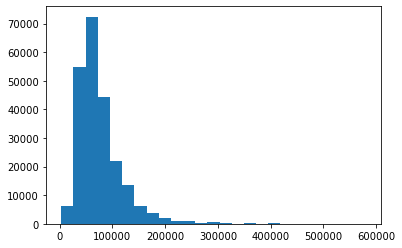

In [27]:
plt.figure()
plt.hist(loan_sample['annual_inc'] , bins =25)
plt.show()

One can investigate the behavior of different features amongst fully paid and charged off loans e.g., looking at the annual income of the fully paid and charged off loans.

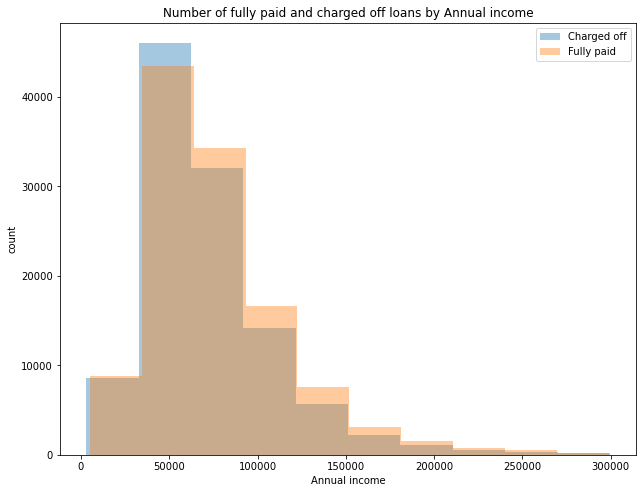

In [28]:
fully_paid_by_AnnualIncome = loan_sample.loc[(loan_sample['loan_status']==0) &(loan_sample['annual_inc']<300000),\
                                               'annual_inc']
charged_off_by_AnnualIncome = loan_sample.loc[(loan_sample['loan_status']==1)&(loan_sample['annual_inc']<300000),\
                                              'annual_inc']

fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
plt.hist(charged_off_by_AnnualIncome , alpha=0.4 , label='Charged off')
plt.hist(fully_paid_by_AnnualIncome, alpha=0.4 , label='Fully paid')
plt.legend()
plt.title('Number of fully paid and charged off loans by Annual income')
plt.xlabel('Annual income')
plt.ylabel('count')
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

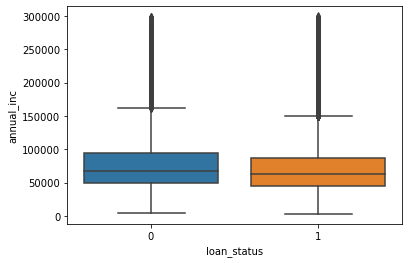

In [29]:
sns.boxplot(data=loan_sample[loan_sample['annual_inc']<300000], x="loan_status", y="annual_inc")

Both the distribution plot and the box plot show that the charged off applicants had less annual income. However, the difference is not significant. 

We can also look at the how charged off and fully paid loans were different in terms of interest rate and loan amount 

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

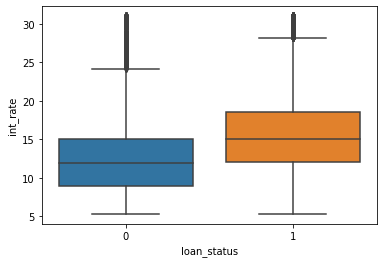

In [30]:
sns.boxplot(data=loan_sample, x="loan_status", y="int_rate")

Charged off (=1) applicants had to pay higher interest. It is not clear that they charged off because they had to pay back more or LendingClub assign them higher interest rate based on their evaluation of applicants. 

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

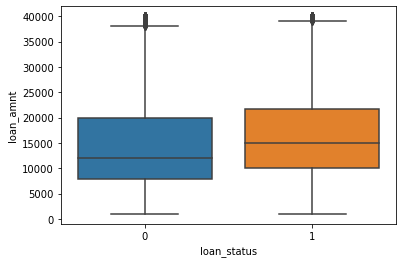

In [31]:
sns.boxplot(data=loan_sample, x="loan_status", y="loan_amnt")

The charged off applicant requested for higher amount of loans. 

Next, lets look at the distribution of the categorical columns

In [32]:
# list of categorical columns
cat_col_name=loan_sample.select_dtypes(include='object').columns
cat_col_name

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'purpose', 'title', 'addr_state'],
      dtype='object')

In [33]:
loan_sample['emp_title'].value_counts()

Teacher                                   4095
Manager                                   3942
Owner                                     2366
Driver                                    1882
Registered Nurse                          1680
                                          ... 
Stenographer/Court Reporter                  1
Asst Front End manager                       1
Senior Application Processor                 1
Director of Communications & Marketing       1
Speech Assistant                             1
Name: emp_title, Length: 85670, dtype: int64

All the categorical columns have reasonable number of categories except for `emp_title` which takes over than 100000 different values. I will drop this column.

In [34]:
loan_sample.drop(columns=['emp_title'], inplace=True)

The two columns `title` and `purpose` are very similar. 

In [35]:
loan_sample['title'].value_counts()

Debt consolidation              125670
Credit card refinancing          45000
Home improvement                 13296
Other                            12848
Major purchase                    4610
                                 ...  
Dedt consolidation                   1
pay off high rate cards loan         1
New Baby Debt Consolidation          1
Save our house                       1
credit card consiladation            1
Name: title, Length: 6738, dtype: int64

In [36]:
loan_sample['purpose'].value_counts()

debt_consolidation    135748
credit_card            48643
home_improvement       14069
other                  13467
major_purchase          4861
medical                 2729
small_business          2568
car                     2119
moving                  1633
vacation                1530
house                   1347
renewable_energy         147
wedding                   97
Name: purpose, dtype: int64

I will drop the `title` column as it is less consistant and has more fields 

In [37]:
loan_sample.drop(columns=['title'], inplace=True)

In [38]:
# list of categorical columns
cat_col_name=loan_sample.select_dtypes(include='object').columns
cat_col_name

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'purpose', 'addr_state'],
      dtype='object')

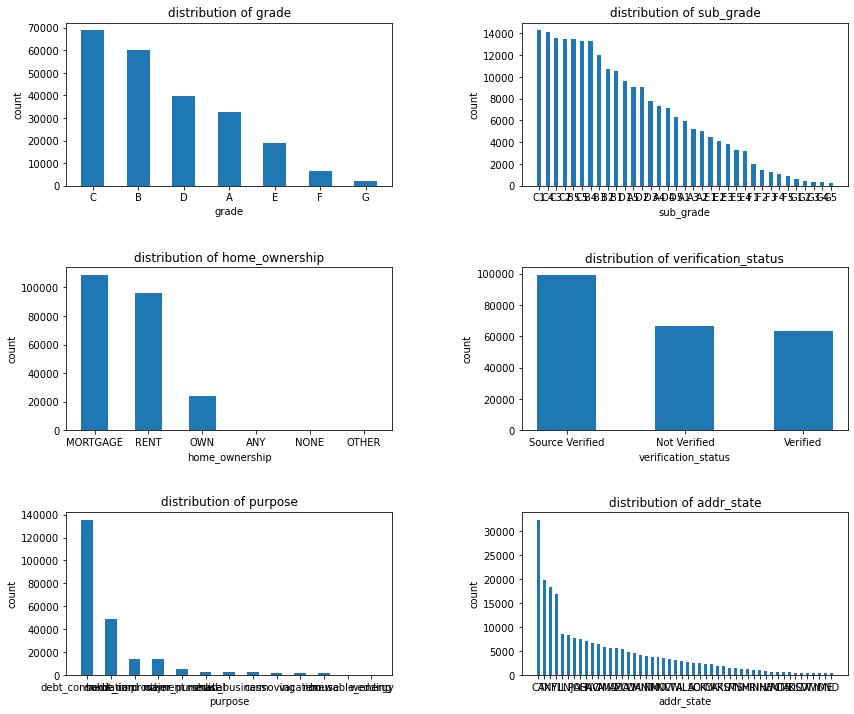

In [39]:

fig, axes=plt.subplots(3,2,figsize=(14,12) )
i=1
for name in (cat_col_name):
    categories = loan_sample[name].value_counts().index
    counts = loan_sample[name].value_counts().values
    plt.subplot(3,2,i)
    plt.bar(categories, counts, width=0.5)
    plt.xlabel(name)
    plt.ylabel("count")
    plt.title(f'distribution of {name}')
    i+=1
    plt.subplots_adjust( wspace=0.4, hspace=0.5)
plt.show()


Let's have a closer look at `purpose`, `sub_grade`, `addr_state` (The x labels are not clear in the above figure)  

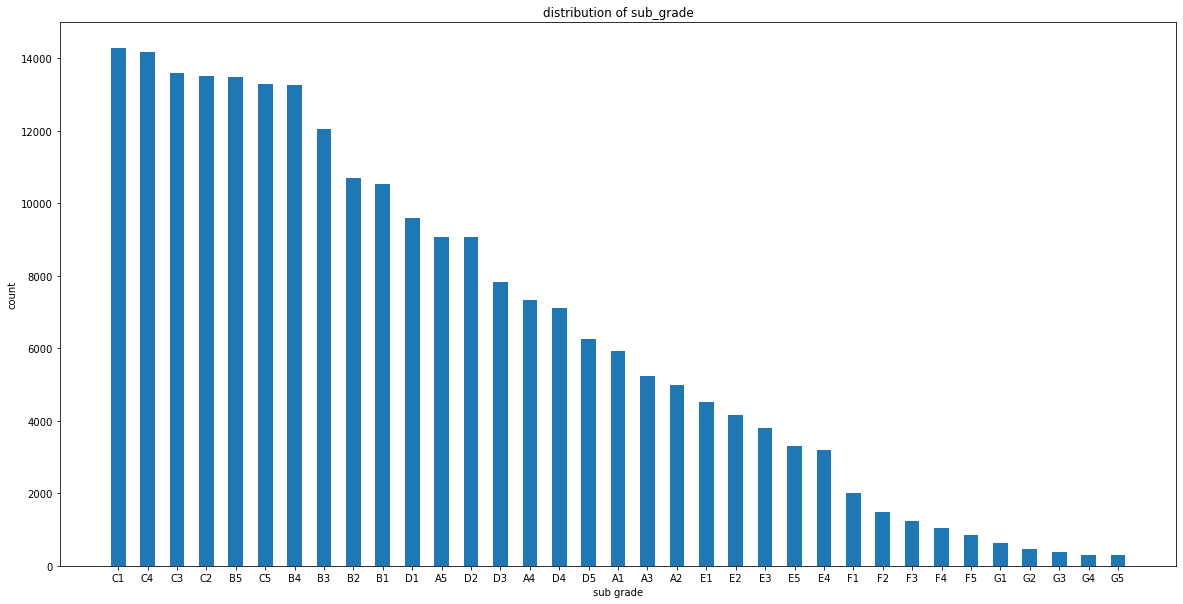

In [40]:
categories = loan_sample['sub_grade'].value_counts().index
counts = loan_sample['sub_grade'].value_counts().values
plt.figure(figsize=(20,10))
plt.bar(categories, counts, width=0.5)
plt.xlabel('sub grade')
plt.ylabel('count')
plt.title("distribution of sub_grade")
plt.show()

It seems that `grade` and `sub_grade` are related. Actually, the `sub_grade` column is more detailed than `grade` so we do not need to keep `grade`. 

In [41]:
loan_sample.drop(columns=['grade'], inplace=True)

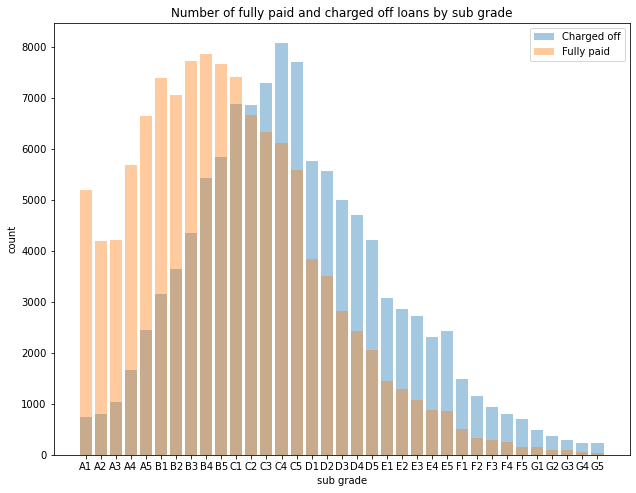

In [42]:
fully_paid_by_subgrade = loan_sample.loc[loan_sample['loan_status']==0, 'sub_grade'].value_counts().sort_index()
charged_off_by_subgrade = loan_sample.loc[loan_sample['loan_status']==1, 'sub_grade'].value_counts().sort_index()

fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(charged_off_by_subgrade.index , charged_off_by_subgrade.values , alpha=0.4 , label='Charged off')
ax.bar(fully_paid_by_subgrade.index , fully_paid_by_subgrade.values , alpha=0.4 , label='Fully paid')
plt.legend()
plt.title('Number of fully paid and charged off loans by sub grade')
plt.xlabel('sub grade')
plt.ylabel('count')
plt.show()

It is seen that the loan status does depend on sub grade. We can look at the relative ratio of fully paid and charged off loans to get a btter understanding.

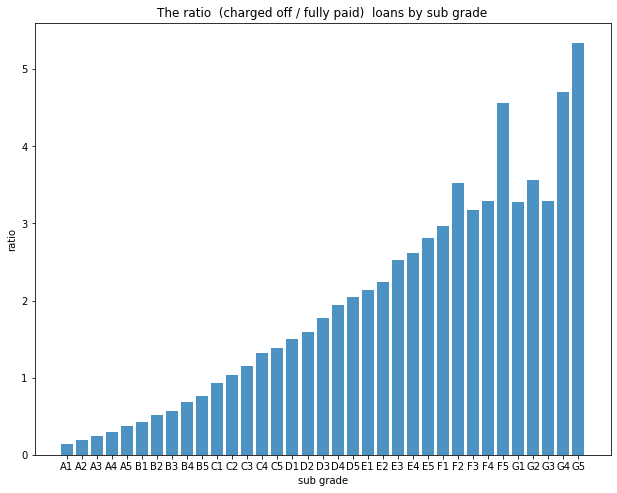

In [43]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(charged_off_by_subgrade.index , charged_off_by_subgrade.values/fully_paid_by_subgrade.values , alpha=0.8)
plt.title('The ratio  (charged off / fully paid)  loans by sub grade')
plt.xlabel('sub grade')
plt.ylabel('ratio')
plt.show()

It is clearely seen that sub_grade is an important categorical feature. Going from A_1 to G_5, an increasing trend in the number of charged off loans is seen. Thus sub_grade is an important feature. <br>  
It is noted that this graph does not display the actual ratio of the fully paid and charged off loans because in the original dataset, there are much more fully paid loans compared to charged off loans. The reason that we see this behavior here is that we deliberately chose a balanced sample for our loan dataset i.e., if we had the same number of fully paid and charged off loans, the figure above would have been the ratio of the two categories by sub grade. <br>



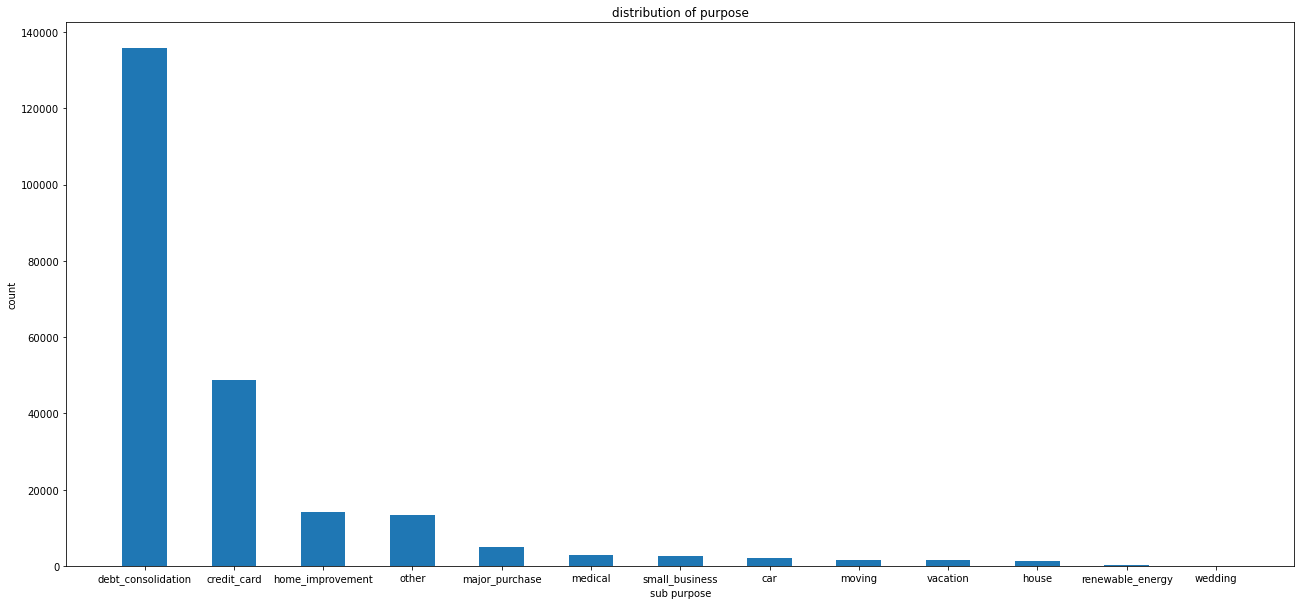

In [44]:
categories = loan_sample['purpose'].value_counts().index
counts = loan_sample['purpose'].value_counts().values
plt.figure(figsize=(22,10))
plt.bar(categories, counts, width=0.5)
plt.xlabel('sub purpose')
plt.ylabel('count')
plt.title("distribution of purpose")
plt.show()

The top 3 purposes of the loans are: <br>
1- debt consolidation <br>
2- credit card <br>
3- home improvement <br>

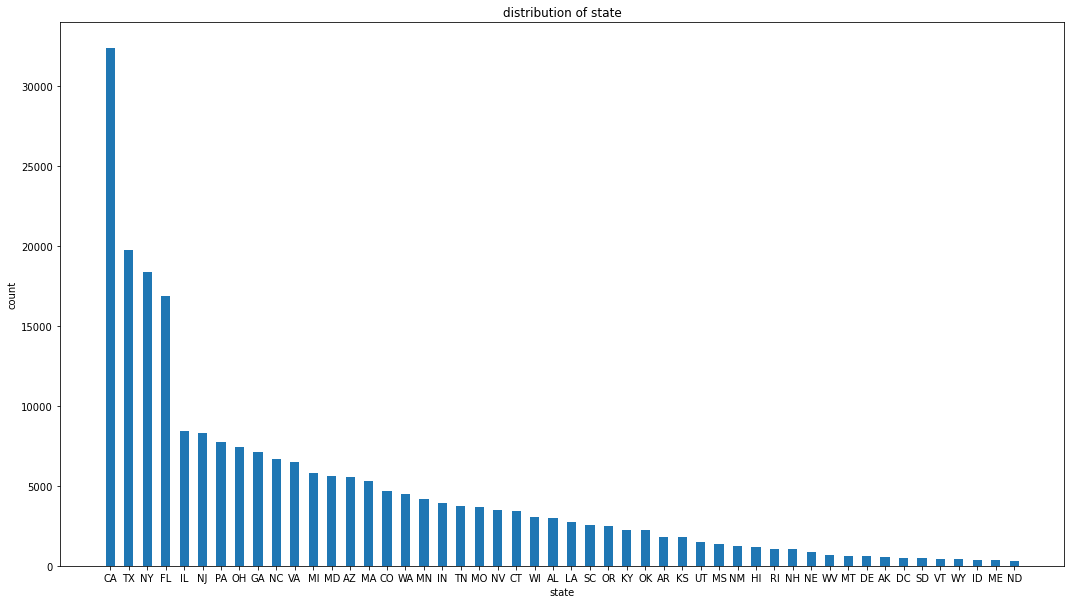

In [45]:
categories = loan_sample['addr_state'].value_counts().index
counts = loan_sample['addr_state'].value_counts().values
plt.figure(figsize=(18,10))
plt.bar(categories, counts, width=0.5)
plt.xlabel('state')
plt.ylabel('count')
plt.title("distribution of state")
plt.show()

There are too many states and it might confuse the model if we try to use onehotcode to dumify the state category. Let's look at the ratio of fully paid and charged off loans by state.

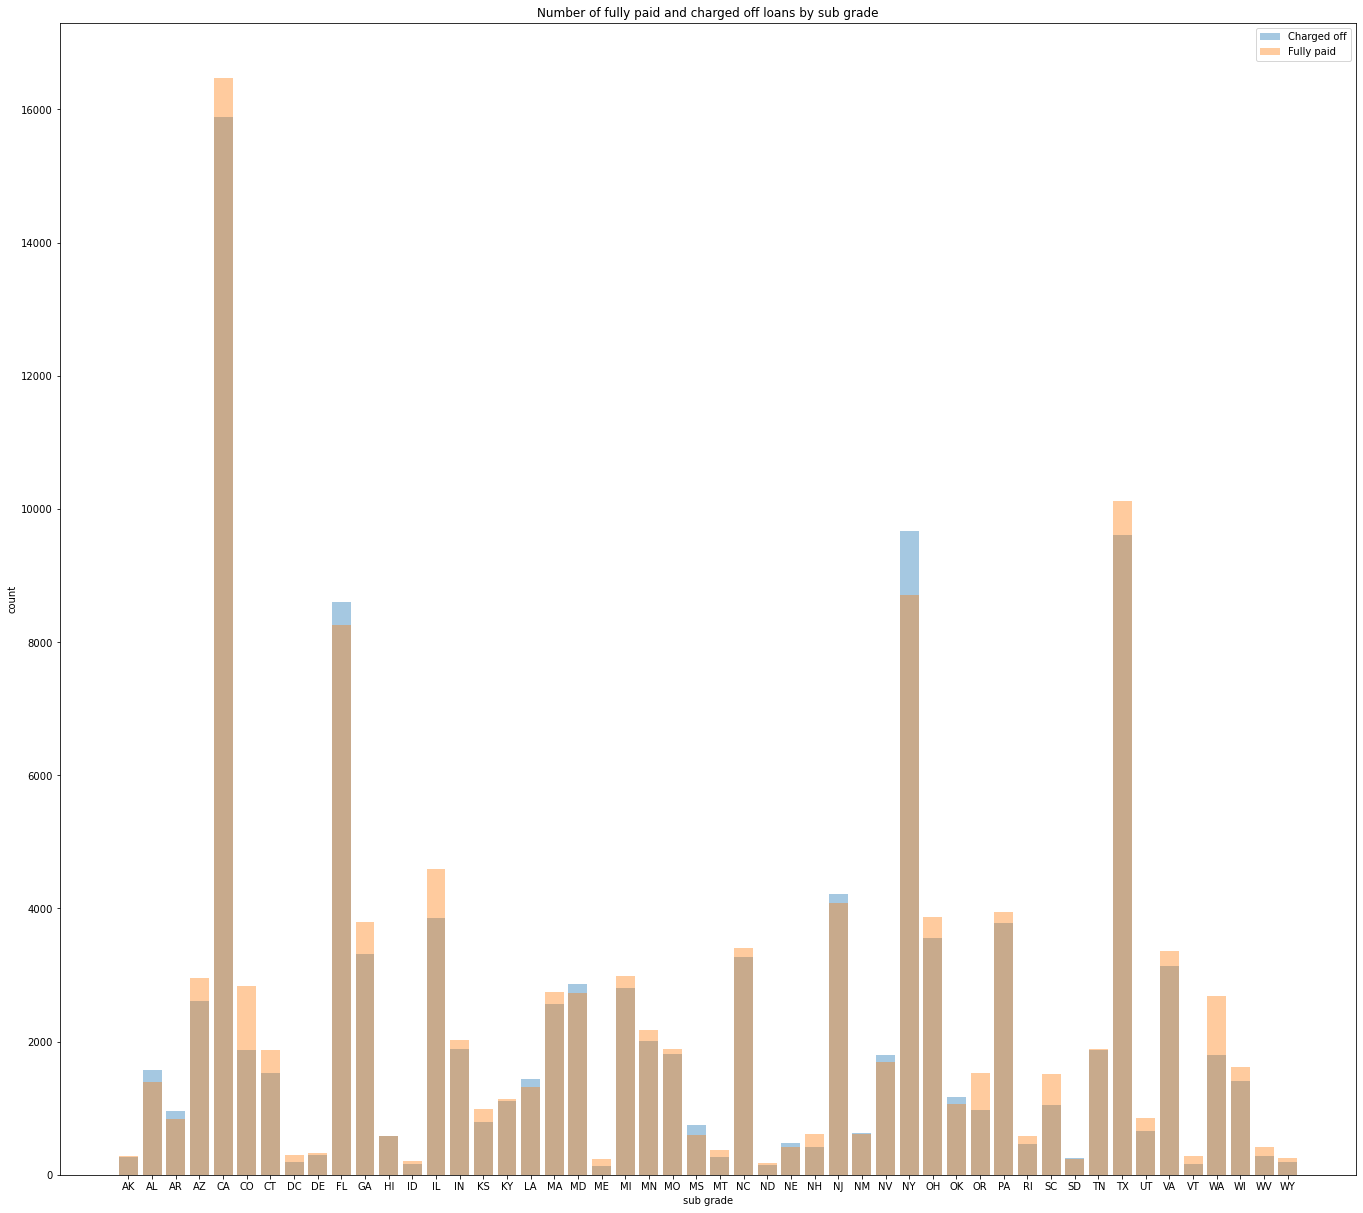

In [46]:
fully_paid_by_state = loan_sample.loc[loan_sample['loan_status']==0, 'addr_state'].value_counts().sort_index()
charged_off_by_state = loan_sample.loc[loan_sample['loan_status']==1, 'addr_state'].value_counts().sort_index()

fig = plt.figure(figsize=(18,16))
ax = fig.add_axes([0,0,1,1])
ax.bar(charged_off_by_state.index , charged_off_by_state.values , alpha=0.4 , label='Charged off')
ax.bar(fully_paid_by_state.index , fully_paid_by_state.values , alpha=0.4 , label='Fully paid')
plt.legend()
plt.title('Number of fully paid and charged off loans by sub grade')
plt.xlabel('sub grade')
plt.ylabel('count')
plt.show()

The distribution of fully paid and charged off loans are about the same in all states. Therefore, we can drop this column.

In [47]:
loan_sample.drop(columns=['addr_state'], inplace=True)

In [48]:
# % of each category in home_ownership column 
loan_sample['home_ownership'].value_counts()/loan_sample['home_ownership'].count()

MORTGAGE    0.474567
RENT        0.419313
OWN         0.105399
ANY         0.000677
NONE        0.000026
OTHER       0.000017
Name: home_ownership, dtype: float64

In `home_ownership` column, `ANY`, `OTHER`, `NONE` are a very small fraction of the column. Im going to map `Any` --> `OTHER`, `NONE`--> `OTHER`

In [49]:
loan_sample.replace({'home_ownership': {'ANY':'OTHER', 'NONE':'OTHER'}}, inplace=True)
loan_sample['home_ownership'].value_counts()

MORTGAGE    108656
RENT         96005
OWN          24132
OTHER          165
Name: home_ownership, dtype: int64

`application_type` and `loan_status` are binary columns which can be mapped to 0 and 1

The last next step is categorical data encoding using OneHotEncoder i.e., convert categorical columns to numeric features

In [50]:
categorical_cols = loan_sample.select_dtypes(include='object').columns
categorical_cols

Index(['sub_grade', 'home_ownership', 'verification_status', 'purpose'], dtype='object')

In [51]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

transformed_data = onehotencoder.fit_transform(loan_sample[categorical_cols])


In [52]:
# Name of all columns of onehotencoder
category_name = []
for rows in range (0, len(onehotencoder.categories_)):
    for cols in range(0 , len(onehotencoder.categories_[rows])):
        category_name.append(onehotencoder.categories_[rows][cols])


In [53]:
# the above transformed_data is an array so convert it to dataframe
encoded_data = pd.DataFrame(transformed_data.toarray(), columns=category_name)

In [54]:
# Dropping the original categorical columns 
loan_sample.drop(columns=categorical_cols , inplace=True)

In [55]:
# now concatenate the original data and the encoded data using pandas
loan_sample_onehotcode = pd.concat([loan_sample, encoded_data], axis=1)

In [56]:
encoded_data

,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
228956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
loan_sample

,index,loan_status,last_fico_avg,int_rate,term,fico_avg,acc_open_past_24mths,funded_amnt,loan_amnt,tot_hi_cred_lim,...,earliest_cr_line_year,revol_util,annual_inc,mo_sin_old_il_acct,revol_bal,open_acc,issue_year,pub_rec,application_type,emp_length
0,0,0,697.0,20.55,60,702.0,7.0,32025.0,32025.0,210073.0,...,1998,54.6,100000.0,252.0,29538.0,14.0,2019,0.0,1,7
1,1,0,682.0,9.99,36,687.0,4.0,11200.0,11200.0,97239.0,...,2002,45.7,65000.0,115.0,9790.0,8.0,2015,0.0,0,10
2,2,0,692.0,15.05,36,662.0,2.0,20000.0,20000.0,32716.0,...,1985,77.8,60000.0,140.0,13841.0,10.0,2017,0.0,0,1
3,3,1,507.0,11.53,36,672.0,2.0,10000.0,10000.0,14200.0,...,2005,80.5,95000.0,120.0,11426.0,3.0,2015,0.0,0,1
4,4,1,507.0,17.27,60,662.0,5.0,11050.0,11050.0,245250.0,...,2004,36.2,100000.0,136.0,3656.0,10.0,2016,0.0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228953,235022,1,582.0,12.99,60,682.0,3.0,28000.0,28000.0,710220.0,...,2007,34.7,160000.0,75.0,8389.0,30.0,2014,0.0,0,2
228954,235023,1,512.0,15.57,36,662.0,7.0,10000.0,10000.0,41146.0,...,2010,86.2,45000.0,108.0,9914.0,8.0,2019,0.0,0,3
228955,235024,0,682.0,16.14,36,672.0,3.0,2000.0,2000.0,25550.0,...,2010,57.6,31000.0,71.0,6736.0,6.0,2018,0.0,0,1
228956,235025,0,677.0,25.82,60,662.0,2.0,20000.0,20000.0,64335.0,...,2005,81.0,52504.0,143.0,20493.0,14.0,2017,0.0,0,7


In [58]:
loan_sample_onehotcode.shape

(228958, 80)

In [60]:
loan_sample_onehotcode.drop(columns='index', inplace=True)

In [61]:
loan_sample_onehotcode

,loan_status,last_fico_avg,int_rate,term,fico_avg,acc_open_past_24mths,funded_amnt,loan_amnt,tot_hi_cred_lim,dti,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,697.0,20.55,60,702.0,7.0,32025.0,32025.0,210073.0,39.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,682.0,9.99,36,687.0,4.0,11200.0,11200.0,97239.0,28.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,692.0,15.05,36,662.0,2.0,20000.0,20000.0,32716.0,19.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,507.0,11.53,36,672.0,2.0,10000.0,10000.0,14200.0,3.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,507.0,17.27,60,662.0,5.0,11050.0,11050.0,245250.0,8.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228953,1,582.0,12.99,60,682.0,3.0,28000.0,28000.0,710220.0,19.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228954,1,512.0,15.57,36,662.0,7.0,10000.0,10000.0,41146.0,25.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228955,0,682.0,16.14,36,672.0,3.0,2000.0,2000.0,25550.0,22.92,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
228956,0,677.0,25.82,60,662.0,2.0,20000.0,20000.0,64335.0,27.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


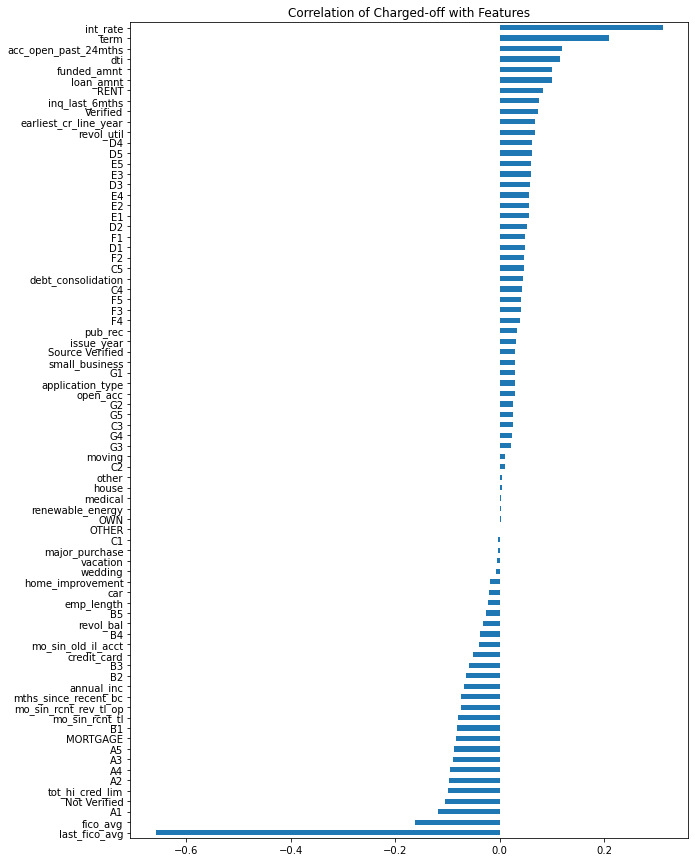

In [65]:
plt.figure(figsize=(10,15))
loan_sample_onehotcode.corr().loan_status.sort_values()[:-1].plot.barh()
plt.title('Correlation of Charged-off with Features');

In [64]:
# Saving the final df as a csv file to be used in Jupyter Notebook 3 and 4
loan_sample_onehotcode.to_csv('C:\\Users\\hamid\\Desktop\\Capstone\\Data\\loan_sample_after_EDA.csv' , index=False)